In [9]:
import h2o
import requests
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,8 mins 32 secs
H2O_cluster_timezone:,Asia/Jakarta
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_fiq_vsn9io
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.978 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [10]:
# Load the wine dataset into an H2O frame
data = h2o.import_file("data/wine.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
print(data.columns)

['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


In [27]:
# Split the data into 70% training and 30% testing
train, test = data.split_frame(ratios=[0.7])

In [32]:
# Build and tune a machine learning model using AutoML
# Specify the task as classification, the maximum runtime as 30 seconds,
# and the number of models to build as 5
aml = h2o.automl.H2OAutoML(max_runtime_secs=30, nfolds=5, seed=1)
aml.train(y='Wine', training_frame=train)

AutoML progress: |
17:15:31.19: AutoML: XGBoost is not available; skipping it.
17:15:31.252: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0355645,0.0304106,0.0198031,0.0721367,0.0209310,0.0631356,0.0018161
mean_residual_deviance,0.0160914,0.0163070,0.0072111,0.0344280,0.0058413,0.0329687,0.0000079
mse,0.0160914,0.0163070,0.0072111,0.0344280,0.0058413,0.0329687,0.0000079
r2,0.969596,0.0315619,0.9845737,0.9310247,0.9919707,0.9404468,0.9999643
residual_deviance,0.0160914,0.0163070,0.0072111,0.0344280,0.0058413,0.0329687,0.0000079
rmse,0.1062566,0.0774672,0.0849184,0.1855478,0.0764283,0.1815727,0.0028157
rmsle,0.0339555,0.0273807,0.0264773,0.0716957,0.0199961,0.0502053,0.0014033


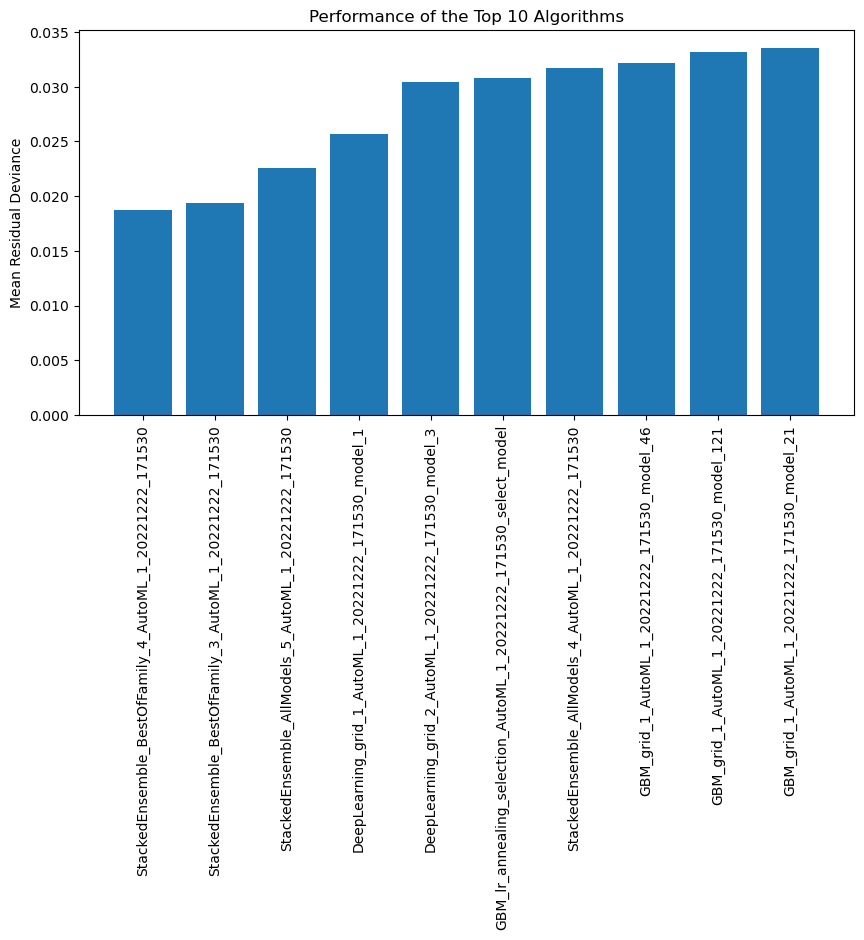

In [37]:
import matplotlib.pyplot as plt

# View the leaderboard
lb = aml.leaderboard

# Extract the top 10 models
top_models = lb.as_data_frame().iloc[:10, :]

# Extract the model names and mean residual deviances
model_names = top_models['model_id'].tolist()
mean_residual_deviances = top_models['mean_residual_deviance'].tolist()

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the results
plt.bar(model_names, mean_residual_deviances)
plt.ylabel('Mean Residual Deviance')
plt.title('Performance of the Top 10 Algorithms')

# Adjust the x-axis tick labels
plt.xticks(rotation=90)

plt.show()

In [38]:
# Make predictions on the test set using the best model
predictions = aml.predict(test)
predictions.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
1.00465
1.00465
1.00465
1.00465
1.00465
1.00465
1.00465
1.00465
1.00465
1.00465


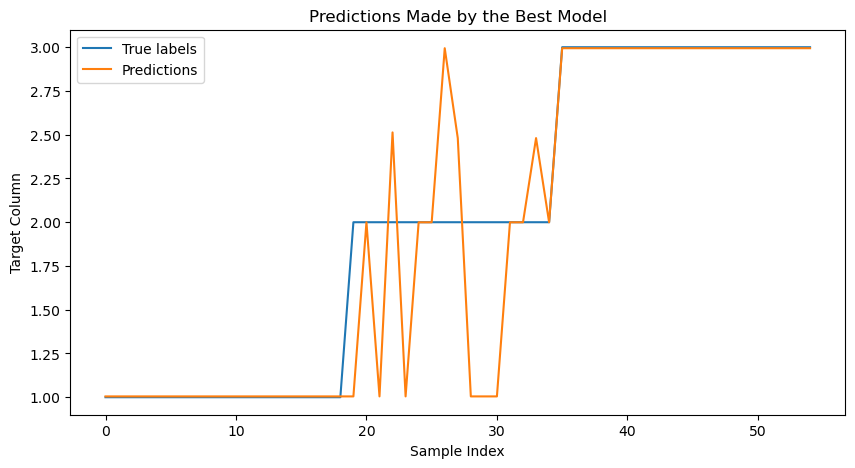

In [41]:
import matplotlib.pyplot as plt

# Extract the true labels and predictions
y_true = test['Wine'].as_data_frame().values
y_pred = predictions['predict'].as_data_frame().values

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the results
plt.plot(y_true, label='True labels')
plt.plot(y_pred, label='Predictions')
plt.ylabel('Target Column')
plt.xlabel('Sample Index')
plt.title('Predictions Made by the Best Model')
plt.legend()
plt.show()